# Analysis of American Award Winning Movies 

We are aiming to conduct analyses on American films that have received recognition in the Oscars and Golden Globes. We would like to explore what categorizes a critically acclaimed/Oscar winning film through analysis of a winning film’s directing, ensemble, and audience reception. In response to popular opinions that award shows often nominate films that are not necessarily box-office hits (but rather lauded as high culture), we plan to analyze the correlation between beloved films rated by the public and award winning movies. We are interested in answering questions such as: Is there a difference between films that win Oscars and films that win Golden Globes? Do award winning films favor a certain demographic range for casting? What genres frequent award show nominations the most? Is there a veritable difference between female and male representation in acclaimed movies and if so do they conform to certain stereotypical roles? Are award winning movies only focused on a collection of niche topical themes? In engaging with this study, we hope to better understand how art is judged and the consequences of award nominations/wins on film viewership.
 

## Data Collection

See **movie_analysis.py**.
The universal IMDb movie id was used to identify films from varying sources. Example: Contagion (2011), IMDb id: tt1598778, IMDb url: www.imdb.com/title/tt1598778/

Sources: 
1. **Pre-existing data sets from IMDb (ie: BestPictureAcademyAwards.csv, Top1000Actors.csv)**
2. **The Movie Database API (information collected from IMDb)** <p>https://developers.themoviedb.org/3/getting-started/introduction </p>
<p>Sample API calls: </p>
3. **See BechdelTest.py** 
 <p> Webscraping for Bechdel Rankings from: https://bechdeltest.com/. </p>


## Data Format


<p>Our data is split into two primary data frames: movies and actors. 
The fields and corresponding details/types are listed below. The unifying unique ID used to identify films is the IMDb ID detailed above. Briefly summarized, our movie data frame holds items like the title of a movie, directors, budget, keywords associated with the plot summary (in the form of a list), and the year of release. Award years are typically one year after the release year and are also included in the dataframe. Most importantly, the movie dataframe holds a full cast list. The 'Cast' column is organized in a list of tuples where each tuple holds the actor's name and their respective rank of appearance in the movie. Lower numbers are associated with important roles (ie rank '1' is the main protagonist). In order to lookup cast information for a select actor: upon accessing an actor through the cast list (given a movie), the actor name is matched in the actor dataframe. Because of SAG protocol, we assume that full stage names for actors are unique and can serve as accurate IDs. </p>

**We plan to expand the actor dataframe to include information such as ethnicity.**

**Movie DataFrame**  


| Fields       | Description                                |
|--------------|--------------------------------------------|
| ID           | unique IMDb id                             |
| Title        | Movie title                                |
| Cast         | List of tuples (actor name, rank in movie) |
| Budget       | Movie budget                               |
| Keywords     | List                                       |
| Bechdel Pass | T/F                                        |
| IMDb Rating  | # from 1- 10                               |
| Runtime      | mins                                       |
| Year         | Year of Release                            |
| Genres       | comma separated string                     |
| Num Votes    | IMDb votes                                 |
| Release Date | Full release date                          |
| Directors    | comma separated string                     |
| Award Year   | Year of Award Nom.(1yr after release)      |
| Winner       | 1 for winner, 0 for nomination             |



**Actor DataFrame** 

| Fields     |  Description                                 |
|------------|----------------------------------------------|
| Actor name | string                                       |
| Gender     | 1 for female, 2 for male, 0 for undocumented |



## Descriptive Statistics

Running the following cell will construct all dataframes required. 

In [5]:
import pandas as pd
from movie_analysis import MovieAnalyzer

## get dataframes
result = MovieAnalyzer().make_dataframes()
movies = result[0]
actors = result[1]

#print data frames
print(movies.head())
print(actors.head())

                                  Title  \
ID                                        
tt0031210                  Dark Victory   
tt0031381            Gone with the Wind   
tt0031385            Goodbye, Mr. Chips   
tt0031593                   Love Affair   
tt0031679  Mr. Smith Goes to Washington   

                                                        Cast   Budget  \
ID                                                                      
tt0031210  [(Bette Davis, 1), (George Brent, 2), (Humphre...        0   
tt0031381  [(Vivien Leigh, 10), (Clark Gable, 11), (Olivi...  4000000   
tt0031385  [(Robert Donat, 1), (Greer Garson, 2), (Terry ...        0   
tt0031593  [(Irene Dunne, 1), (Charles Boyer, 2), (Maria ...        0   
tt0031679  [(James Stewart, 9), (Jean Arthur, 8), (Claude...  1500000   

                                                    Keywords Bechdel Pass  \
ID                                                                          
tt0031210                       

#### Here are some basics pulled from the data frame to complement the data visualizations below. 

### Movies with Largest Female Cast: 

The following adds a column with the number of females per film to our movies data frame.

In [55]:
import numpy as np
import matplotlib.pyplot as plt

#function that iterates through cast list and counts females
def count_females(cast_list):
    female_count = 0
    for item in cast_list: 
        act_ser = actors[actors['Name']==item[0]]
        if act_ser["Gender"].tolist()[0] == 1:
            female_count += 1
    return female_count

#get number of female cast members per movie
movies['no_of_females'] = movies.apply(lambda row: count_females(row['Cast']),axis=1)
print (movies.head())

                                  Title  \
ID                                        
tt0031210                  Dark Victory   
tt0031381            Gone with the Wind   
tt0031385            Goodbye, Mr. Chips   
tt0031593                   Love Affair   
tt0031679  Mr. Smith Goes to Washington   

                                                        Cast   Budget  \
ID                                                                      
tt0031210  [(Bette Davis, 1), (George Brent, 2), (Humphre...        0   
tt0031381  [(Vivien Leigh, 10), (Clark Gable, 11), (Olivi...  4000000   
tt0031385  [(Robert Donat, 1), (Greer Garson, 2), (Terry ...        0   
tt0031593  [(Irene Dunne, 1), (Charles Boyer, 2), (Maria ...        0   
tt0031679  [(James Stewart, 9), (Jean Arthur, 8), (Claude...  1500000   

                                                    Keywords Bechdel Pass  \
ID                                                                          
tt0031210                       

In [56]:
#get movie with largest female cast
female_cast = movies[['no_of_females', 'Title', 'Release Date']]
print(female_cast.max())

no_of_females                     32
Title                           卧虎藏龙
Release Date     2018-12-12 00:00:00
dtype: object


The film with the largest female cast is crouching tiger, hidden dragon (卧虎藏龙). It is a foreign film from 2018. 

In [48]:
#top 10
top_ten = (female_cast.nlargest(10, ['no_of_females']))
print(top_ten)

           no_of_females                            Title Release Date
ID                                                                    
tt3783958             32                       La La Land   2016-08-31
tt0075686             30                       Annie Hall   1977-03-27
tt4925292             29                        Lady Bird   2017-09-01
tt0119822             28               As Good as It Gets   1997-12-06
tt0120338             27                          Titanic   1997-11-01
tt1285016             26               The Social Network   2010-09-24
tt0048960             25  Around the World in Eighty Days   1956-10-17
tt0040806             24                    The Snake Pit   1948-11-04
tt0080678             24                 The Elephant Man   1980-10-02
tt0032194             23         All This, and Heaven Too   1940-07-04


With the exception of a few more recent films (La La Land, Lady Bird, Annie Hall), the majority of the films above still have starring roles occupied by men. See data visualizations below for a more refined take on this.

In [52]:
#average number of females/movie
print(female_cast.mean())

no_of_females    7.532328
dtype: float64


In [58]:
# smallest amount of females/movie
print(female_cast.min())

no_of_females                      0
Title                   12 Angry Men
Release Date     1939-02-10 00:00:00
dtype: object


In [79]:
#winning vs nominated: female cast count
print(">>>OSCAR NOMINATED STATS>>>")
nominated = movies[movies['Winner'] == 0]
nominated_final = nominated[['Title', 'Release Date', 'no_of_females']]
print(nominated_final.max())
print(nominated_final.min())
print(nominated_final.mean())
print(">>>OSCAR WINNER STATS>>>")
winner = movies[movies['Winner'] == 1]
winner_final = winner[['Title', 'Release Date', 'no_of_females']]
print(winner_final.max())
print(winner_final.min())
print(winner_final.mean())

>>>OSCAR NOMINATED STATS>>>
Title                           卧虎藏龙
Release Date     2018-12-12 00:00:00
no_of_females                     32
dtype: object
Title                   12 Angry Men
Release Date     1939-02-10 00:00:00
no_of_females                      0
dtype: object
no_of_females    7.441253
dtype: float64
>>>OSCAR WINNER STATS>>>
Title                West Side Story
Release Date     2018-09-11 00:00:00
no_of_females                     30
dtype: object
Title               12 Years a Slave
Release Date     1939-12-15 00:00:00
no_of_females                      0
dtype: object
no_of_females    7.962963
dtype: float64


### Mean IMDb Ratings For Oscar Winning vs Nominated Films

In [71]:
#get mean for winners
winner_ratings = winner[['IMDb Rating','Title', 'Release Date']]
print(winner_ratings.mean())
print(winner_ratings.std())
print(">>>>>")
#get mean for nominated 
nominated_ratings = nominated[['IMDb Rating','Title', 'Release Date']]
print(nominated_ratings.mean())
print(nominated_ratings.std())

IMDb Rating    7.869136
dtype: float64
IMDb Rating    0.536107
dtype: float64
>>>>>
IMDb Rating    7.613316
dtype: float64
IMDb Rating    0.464223
dtype: float64


The mean for ratings of Oscar winning movies is slightly higher than nominated films. (However, standard deviation is also higher.)



## Data Analysis, Visualizations, and Insights

### Some Preliminary Graphs... 

#### Analyzing Gender Over Time:

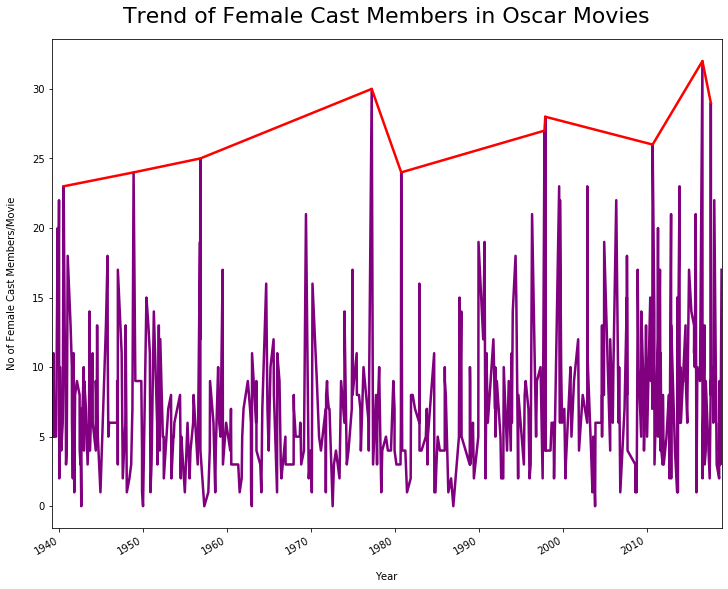

In [49]:
#graph female cast member total based on release date: 

#import graph libs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#convert from string type to date type
movies['Release Date'] = pd.to_datetime(movies['Release Date'])
graph_movies = movies[['Release Date', 'no_of_females']]
#print (graph_movies)

#plot data
graph_movies.set_index('Release Date')['no_of_females'].plot(figsize=(12, 10), linewidth=2.5, color='purple');
top_ten.set_index('Release Date')['no_of_females'].plot(figsize=(12, 10), linewidth=2.5, color='red');

#styling 
plt.xlabel("Year", labelpad=15)
plt.ylabel("No of Female Cast Members/Movie", labelpad=15)
plt.title("Trend of Female Cast Members in Oscar Movies", y=1.02, fontsize=22);


Graph Above: Red line denotes trend line for ten highest female cast movies.  

### Are there disparate levels of female cast members between nominees and winners?

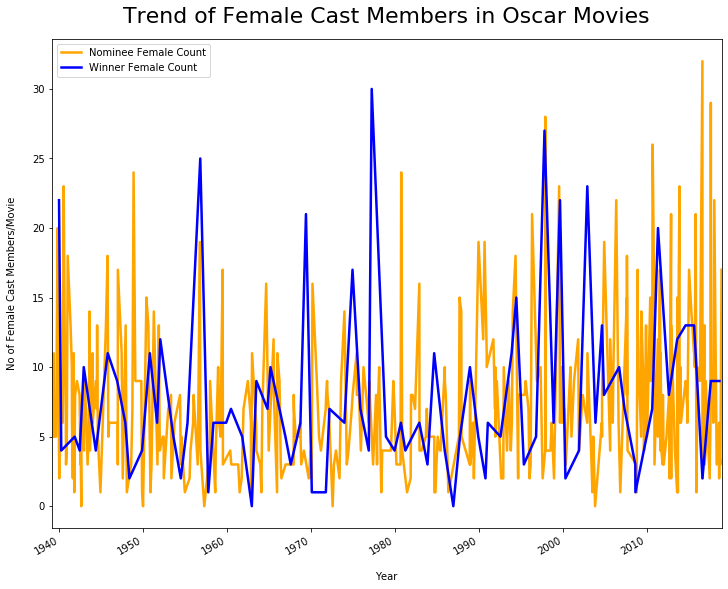

In [78]:
#dfs
nominated.rename(columns = {'no_of_females':'Nominee Female Count'}, inplace = True) 
nominated_graph = nominated[['Release Date', 'Nominee Female Count']]
winner.rename(columns = {'no_of_females':'Winner Female Count'}, inplace = True) 
winner_graph = winner[['Release Date', 'Winner Female Count']]

#plot data
nominated_graph.set_index('Release Date')['Nominee Female Count'].plot(figsize=(12, 10), linewidth=2.5, color='orange', legend = True);
winner_graph.set_index('Release Date')['Winner Female Count'].plot(figsize=(12, 10), linewidth=2.5, color='blue', legend = True);

#styling 
plt.xlabel("Year", labelpad=15)
plt.ylabel("No of Female Cast Members/Movie", labelpad=15)
plt.title("Trend of Female Cast Members in Oscar Movies", y=1.02, fontsize=22);

In the graph above, it seems that recently (2005+) films selected as Oscar winners have significantly lower amounts of female cast members compared to their nominated counterparts. 

--------------------------------------------------------------------------------------------------------

As you may recall,  卧虎藏龙 or crouching tiger, hidden dragon (2018) is the movie with the highest number of female cast members. It is not a coincidence that it is a **foreign film**.

Interestingly, there seem to be periodical increases every decade. One of the first peaks is right before 1950, likely reflecting the increase in women in the workforce (which had reached almost 50% of households after the Great Depression). The largest sharp increase is at the onset of 1980. The late 1970s brought a new era in Hollywood with economic "stagflation" peaking in 1978, driving lavish consumerism amongst the rich (see note below). The Hollywood sign was constructed, ladies like Jane Fonda reigned, and musical films like *Grease* with leading female roles enjoyed wild success. Unsurprisingly, the largest increases are very recent, in light of the *Me Too* movement and other campaigns advocating for gender equality in Hollywood.

However, some of these peaks may be misleading. Some movies have large female ensembles while still featuring a male lead. We can filter for major female roles using the IMDb character rankings in the Cast column of our movies dataframe. Check out the next graph!

Note: Another caveat to point out- by 1978, great income inequality had caused a major riff in America (Hollywood represented a wealthy population likely unaffected by the recession in the 80s). The newly formed socioeconomic divisions are a compelling foundation for examining how this polarizes film viewership >>> *see graph below!* 

### Female Leads

The following graph demonstrates the cumulative number of female leads vs total female cast members for the given time period (intervals in years). The number of movies/time period is equivalent. The visualization is meant to demonstrate the lack of primary female characters in movies despite supposed peaks in overall female casting.

In [80]:
#female roles based on ranking - modify to only count female actor if role is ranked 5 or lower.

def count_females_rankbased(cast_list):
    female_count = 0
    for item in cast_list: 
        act_ser = actors[actors['Name']==item[0]]
        if (act_ser["Gender"].tolist()[0] == 1) and item[1] <= 5:
            female_count += 1
    return female_count

#get number of female cast members per movie
movies['no_of_toprank_females'] = movies.apply(lambda row: count_females_rankbased(row['Cast']),axis=1)
print (movies.head())

                                  Title  \
ID                                        
tt0031210                  Dark Victory   
tt0031381            Gone with the Wind   
tt0031385            Goodbye, Mr. Chips   
tt0031593                   Love Affair   
tt0031679  Mr. Smith Goes to Washington   

                                                        Cast   Budget  \
ID                                                                      
tt0031210  [(Bette Davis, 1), (George Brent, 2), (Humphre...        0   
tt0031381  [(Vivien Leigh, 10), (Clark Gable, 11), (Olivi...  4000000   
tt0031385  [(Robert Donat, 1), (Greer Garson, 2), (Terry ...        0   
tt0031593  [(Irene Dunne, 1), (Charles Boyer, 2), (Maria ...        0   
tt0031679  [(James Stewart, 9), (Jean Arthur, 8), (Claude...  1500000   

                                                    Keywords Bechdel Pass  \
ID                                                                          
tt0031210                       

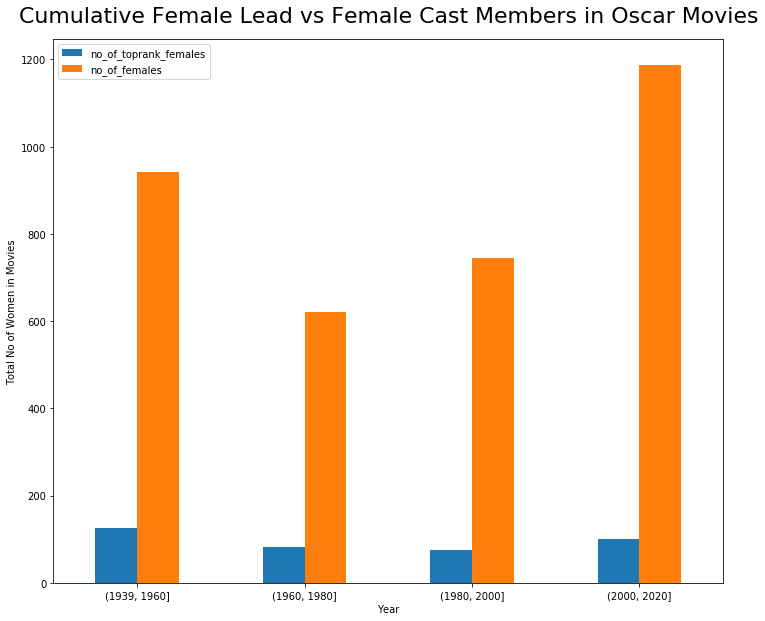

In [190]:
fem_graph=movies[['Award Year','no_of_toprank_females','no_of_females']]

#fem_graph=fem_graph.set_index('Award Year')

bins = pd.cut(fem_graph['Award Year'], [1939, 1960, 1980, 2000,2020])
#print(bins)
new = fem_graph.groupby(bins)['no_of_toprank_females','no_of_females'].sum()
#print(new)
ax = new.plot.bar(rot=0, figsize=(12,10), legend=True)

#styling 
plt.xlabel("Year")
plt.ylabel("Total No of Women in Movies")
plt.title("Cumulative Female Lead vs Female Cast Members in Oscar Movies", y=1.02, fontsize=22);

Women may have been plentiful in Hollywood, but in this appalling representation it's apparent that they never frequently had starring roles in Academy lauded films.

## Future Plans

## Sources and Acknowledgements 